In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import interpolate, integrate

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 700

In [3]:
c = 3e8
G = 6.67e-11
pi = np.pi
const = 96/5*pi**(8/3)*(G/c**3)**(5/3)

Text(0.5, 1.0, "I think this is the O4 design sensitivity but I'm not sure")

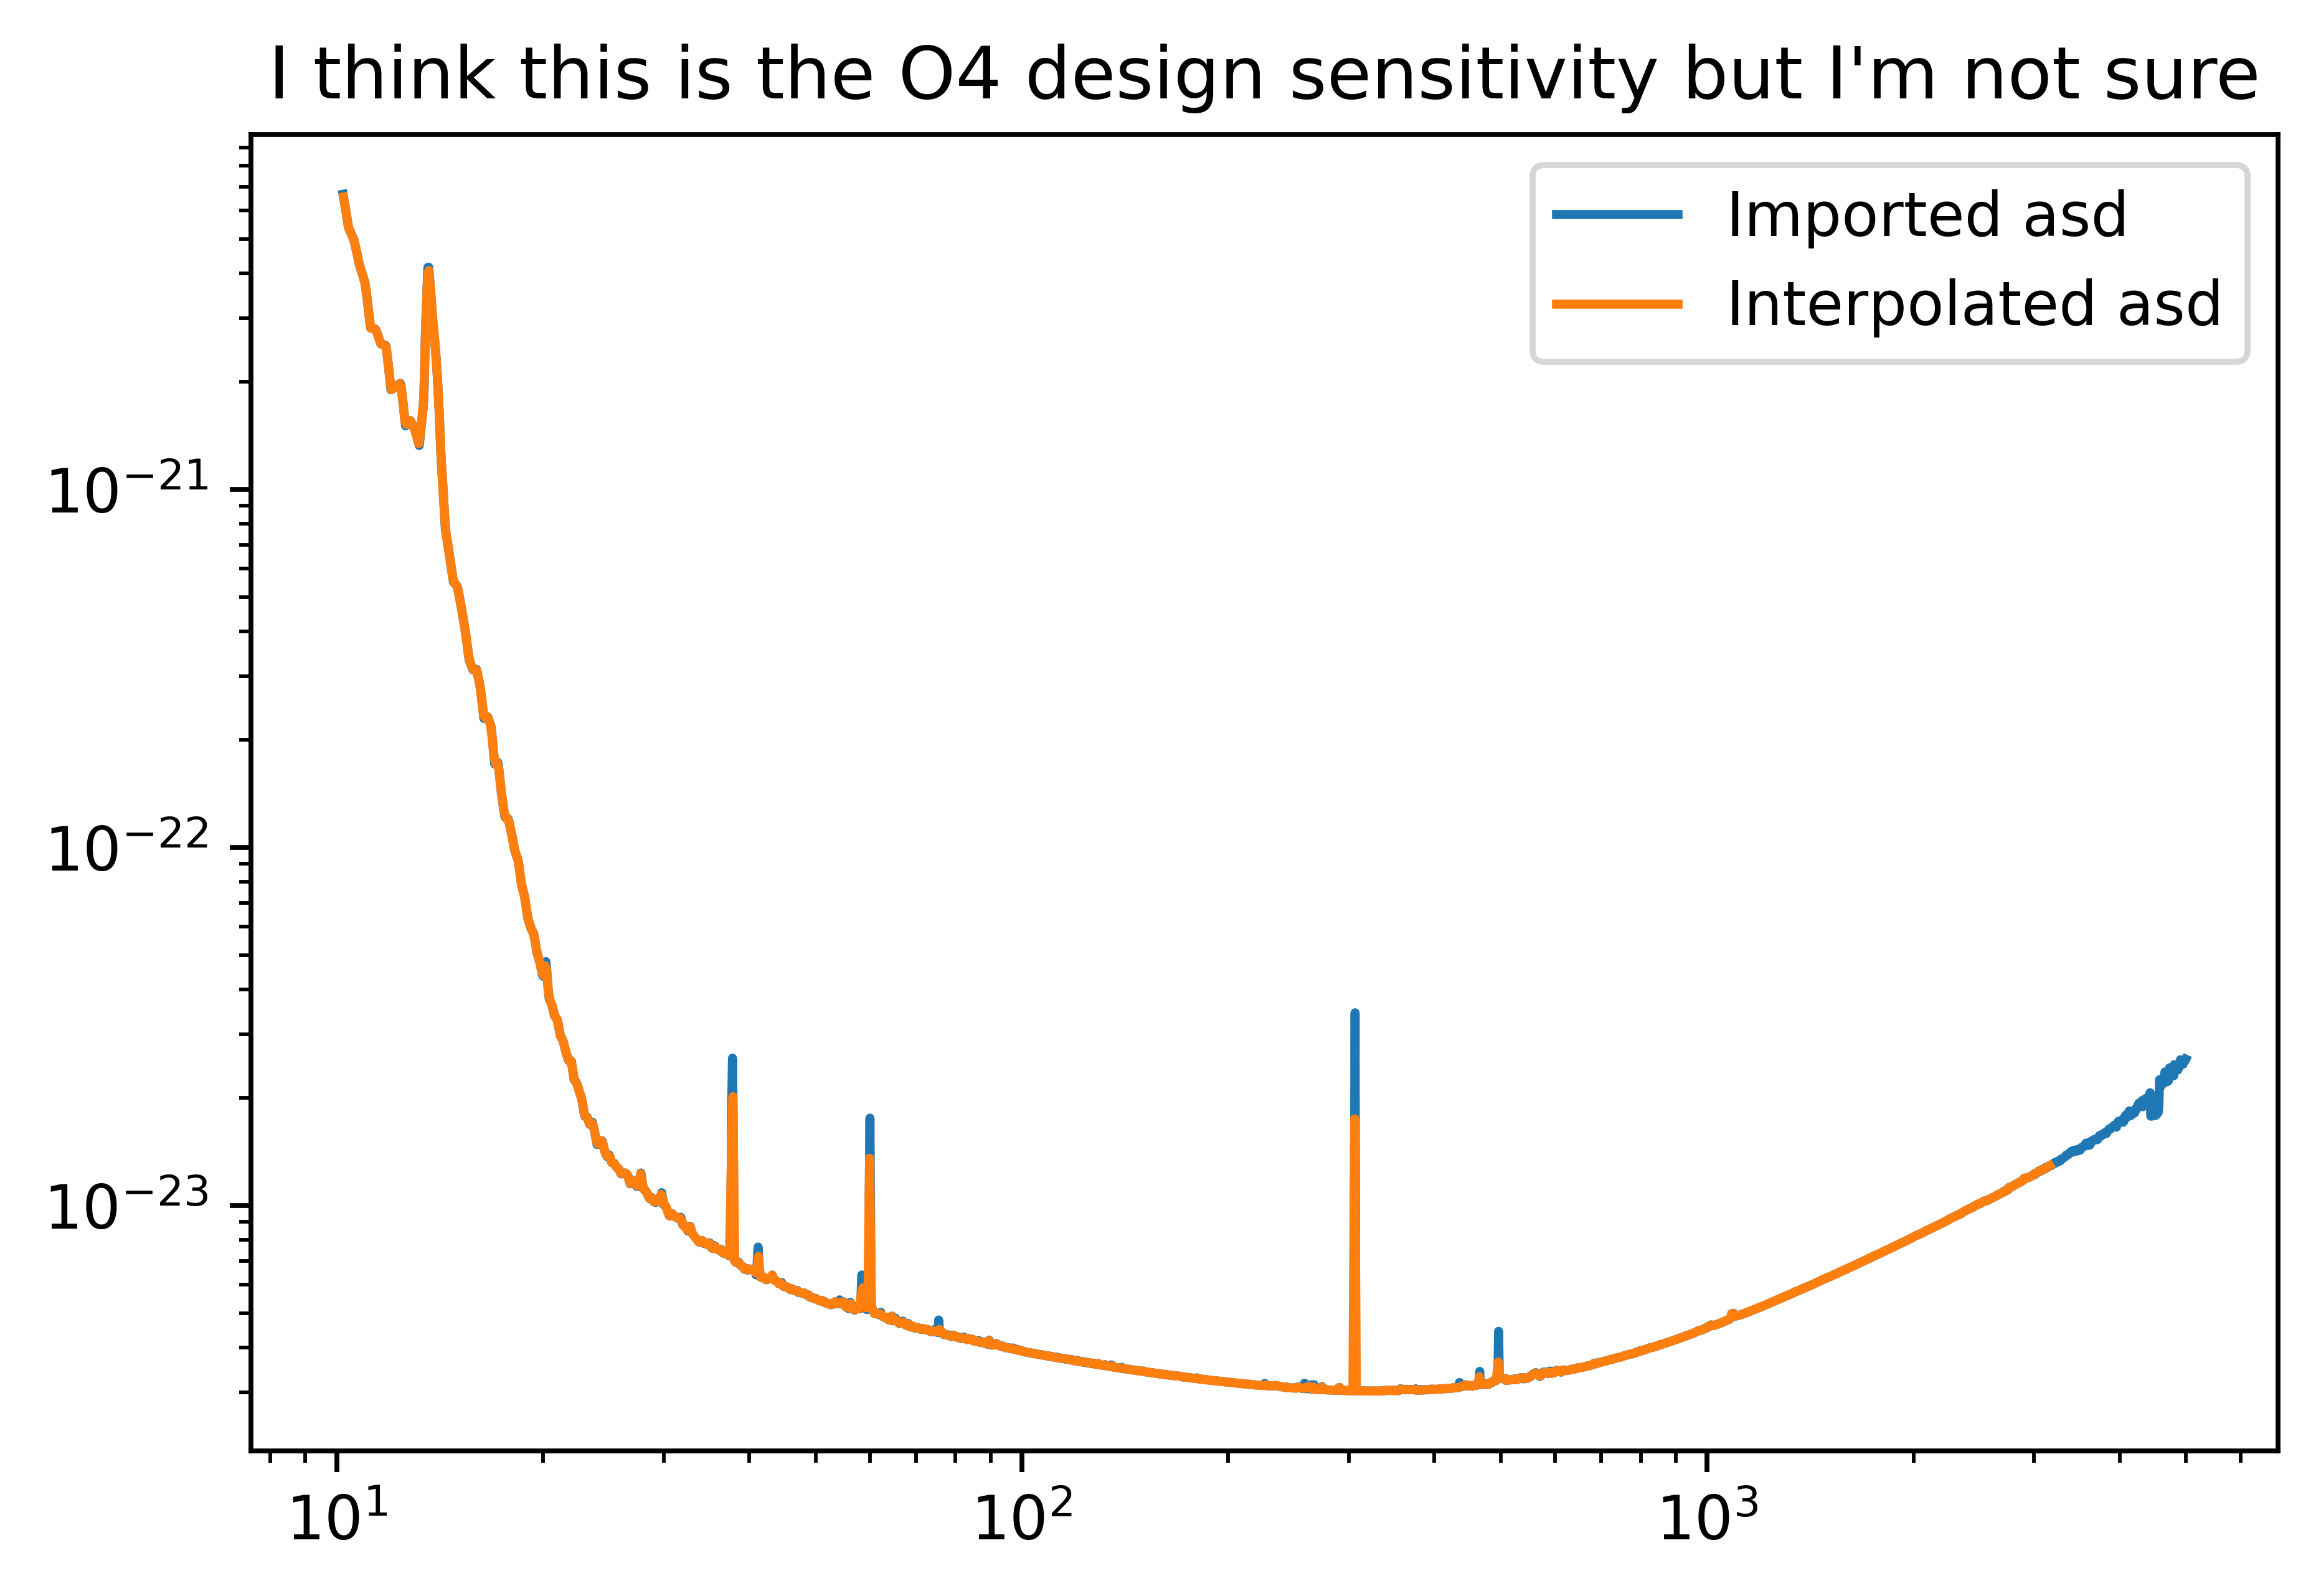

In [4]:
asd = np.loadtxt('asd.txt')
interp_asd = interpolate.interp1d(asd.T[0], asd.T[1]) # , bounds_error = False, fill_value="extrapolate"

xspace = np.logspace(1.01, 3.5, 1000)
pl.loglog(asd.T[0], asd.T[1], label = 'Imported asd')
pl.loglog(xspace, interp_asd(xspace), label = "Interpolated asd")
pl.legend()
pl.title("I think this is the O4 design sensitivity but I'm not sure")

In [5]:
def beta_calc(f0, Mc):
    M = np.multiply(Mc,2e30)
    return const*f0**(8/3)*M**(5/3)

def f_calc(t, f0, Mc):
    return f0*(1-8/3*beta_calc(f0, Mc)*t)**(-3/8)

In [6]:
fspace = np.linspace(20, 200, 101)
Mspace = np.logspace(-5, -3, 99)
[fgrid, Mgrid] = np.meshgrid(fspace, Mspace)

betaGrid = beta_calc(fgrid, Mgrid)
tMax_grid = 0.37/betaGrid
tMax_grid[tMax_grid>3e7] = 3e7

final_f = f_calc(tMax_grid, fgrid, Mgrid)

Text(0, 0.5, '$log(M_c/M_\\odot$)')

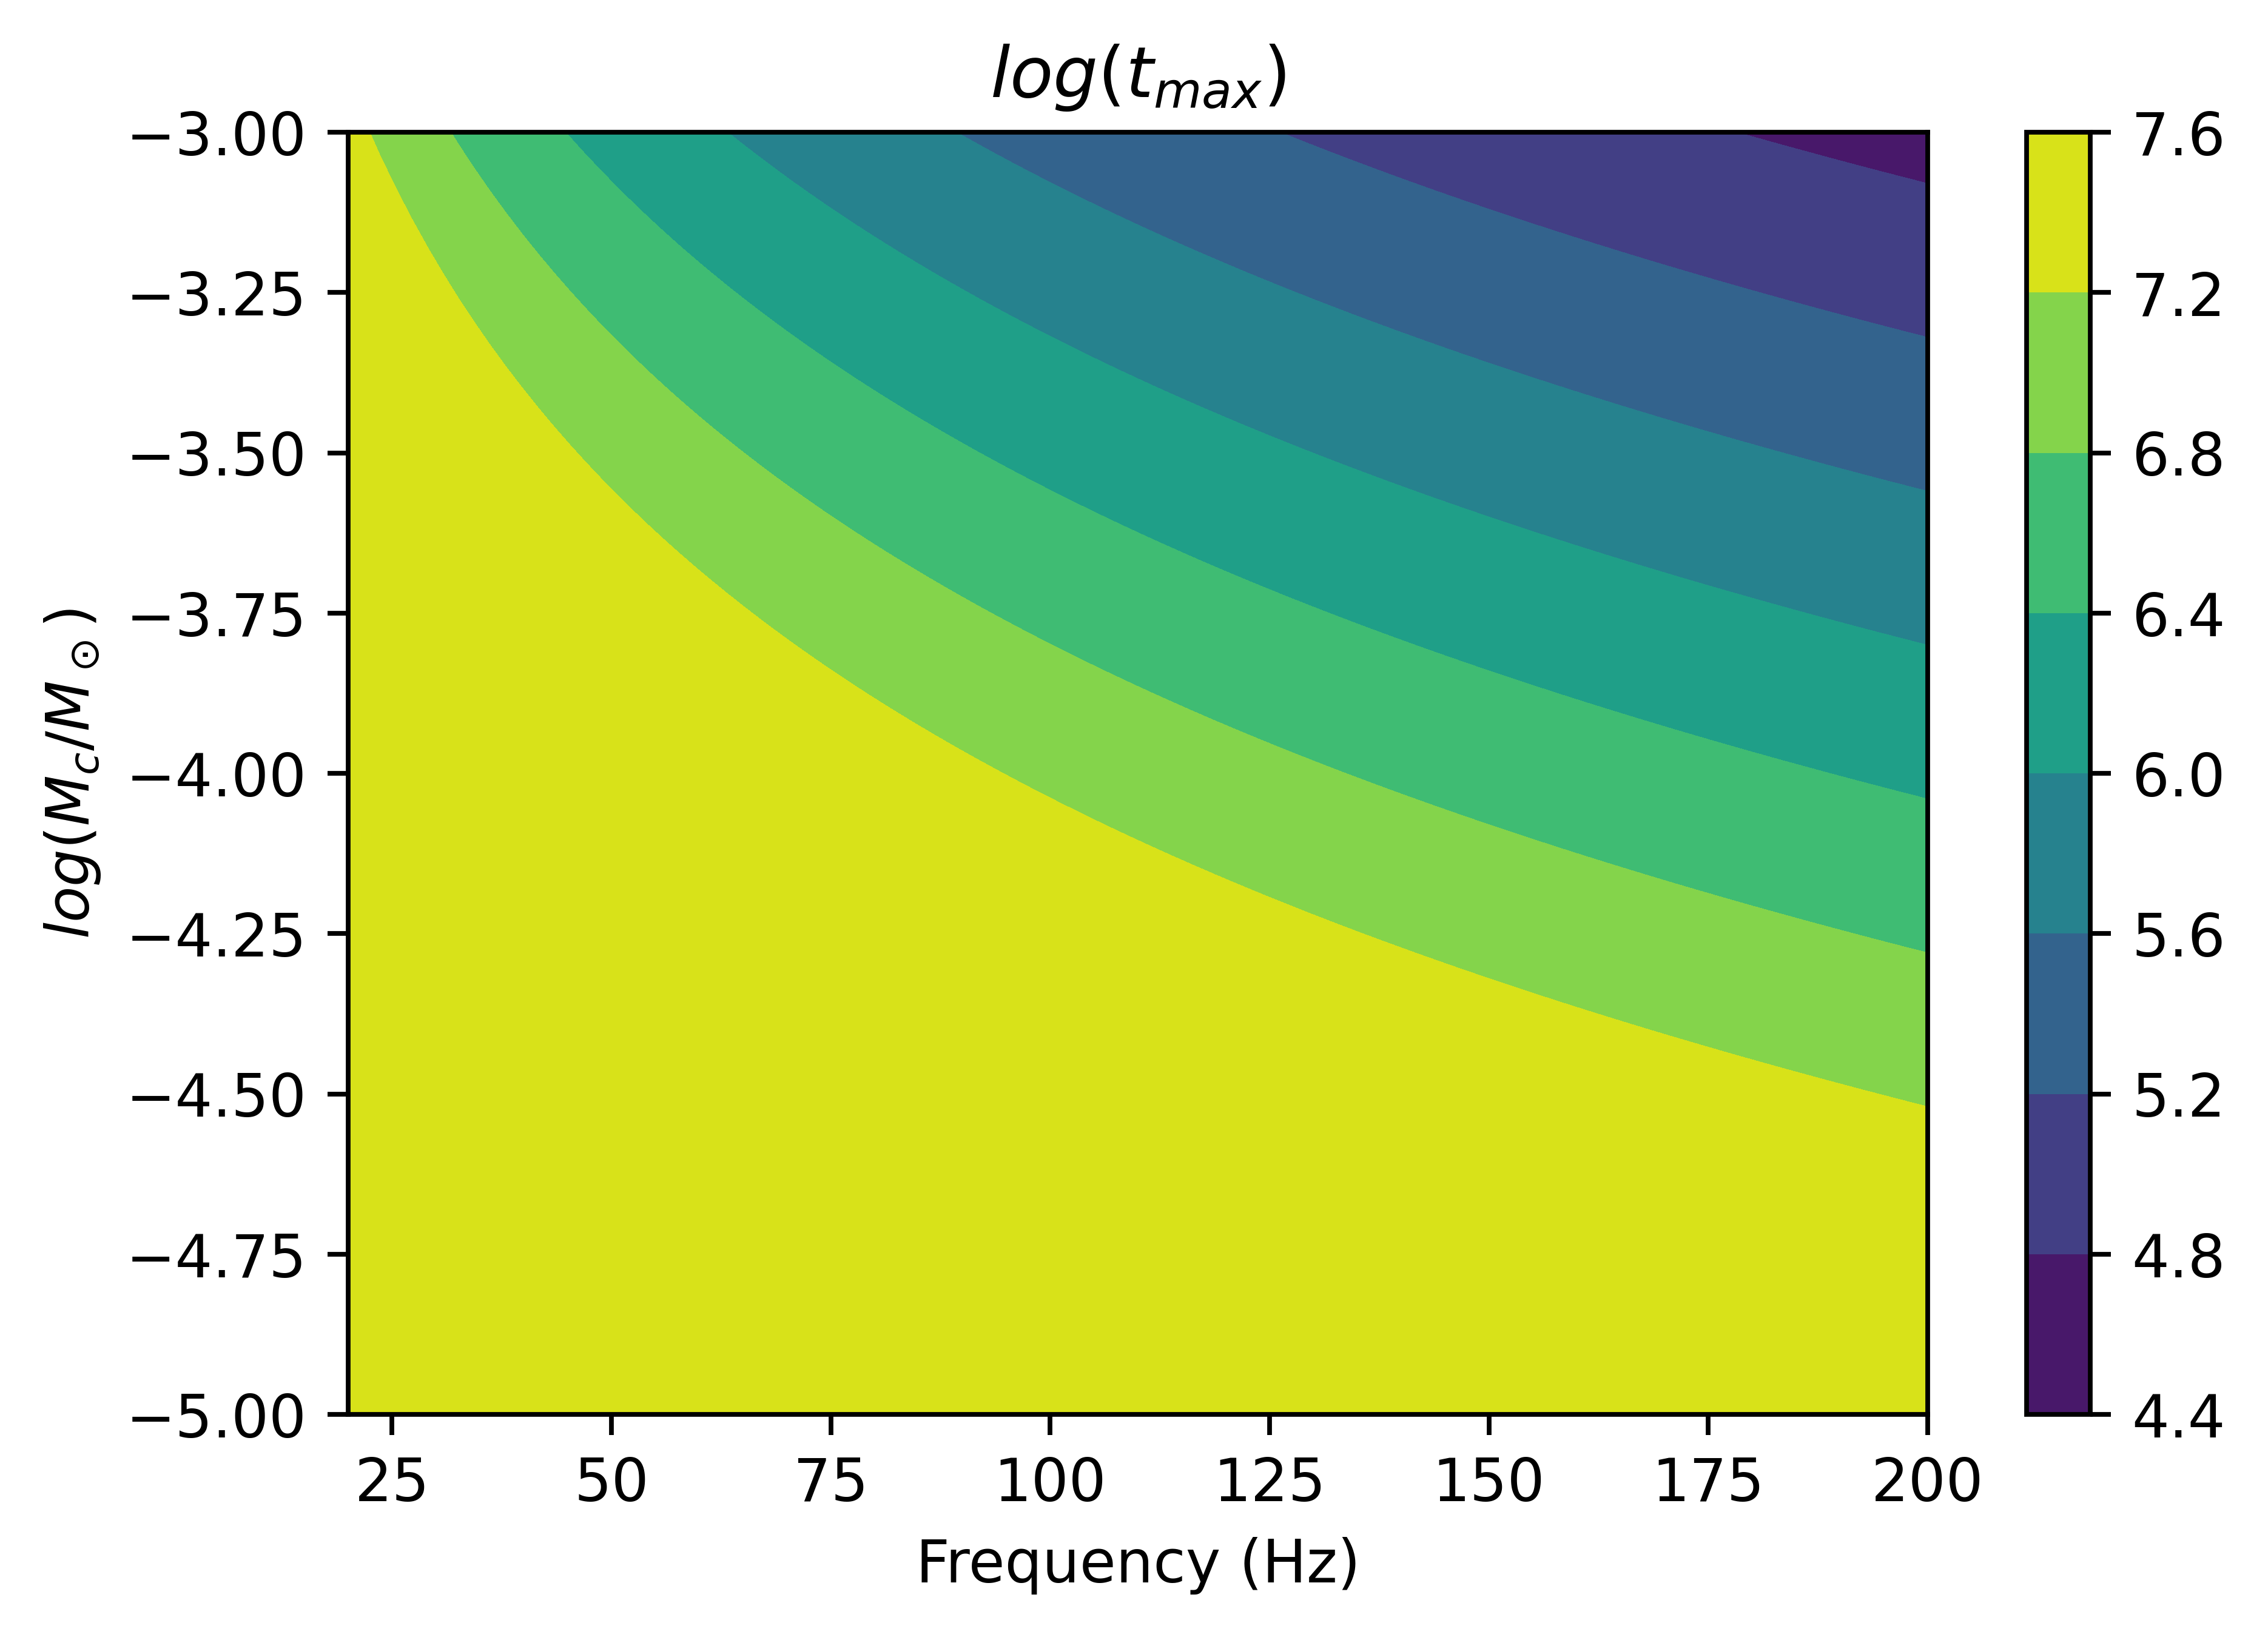

In [7]:
pl.contourf(fspace, np.log10(Mspace), np.log10(tMax_grid))
pl.colorbar()
pl.title(r'$log(t_{max})$')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$log(M_c/M_\odot$)')

Text(0, 0.5, '$log(M_c/M_\\odot$)')

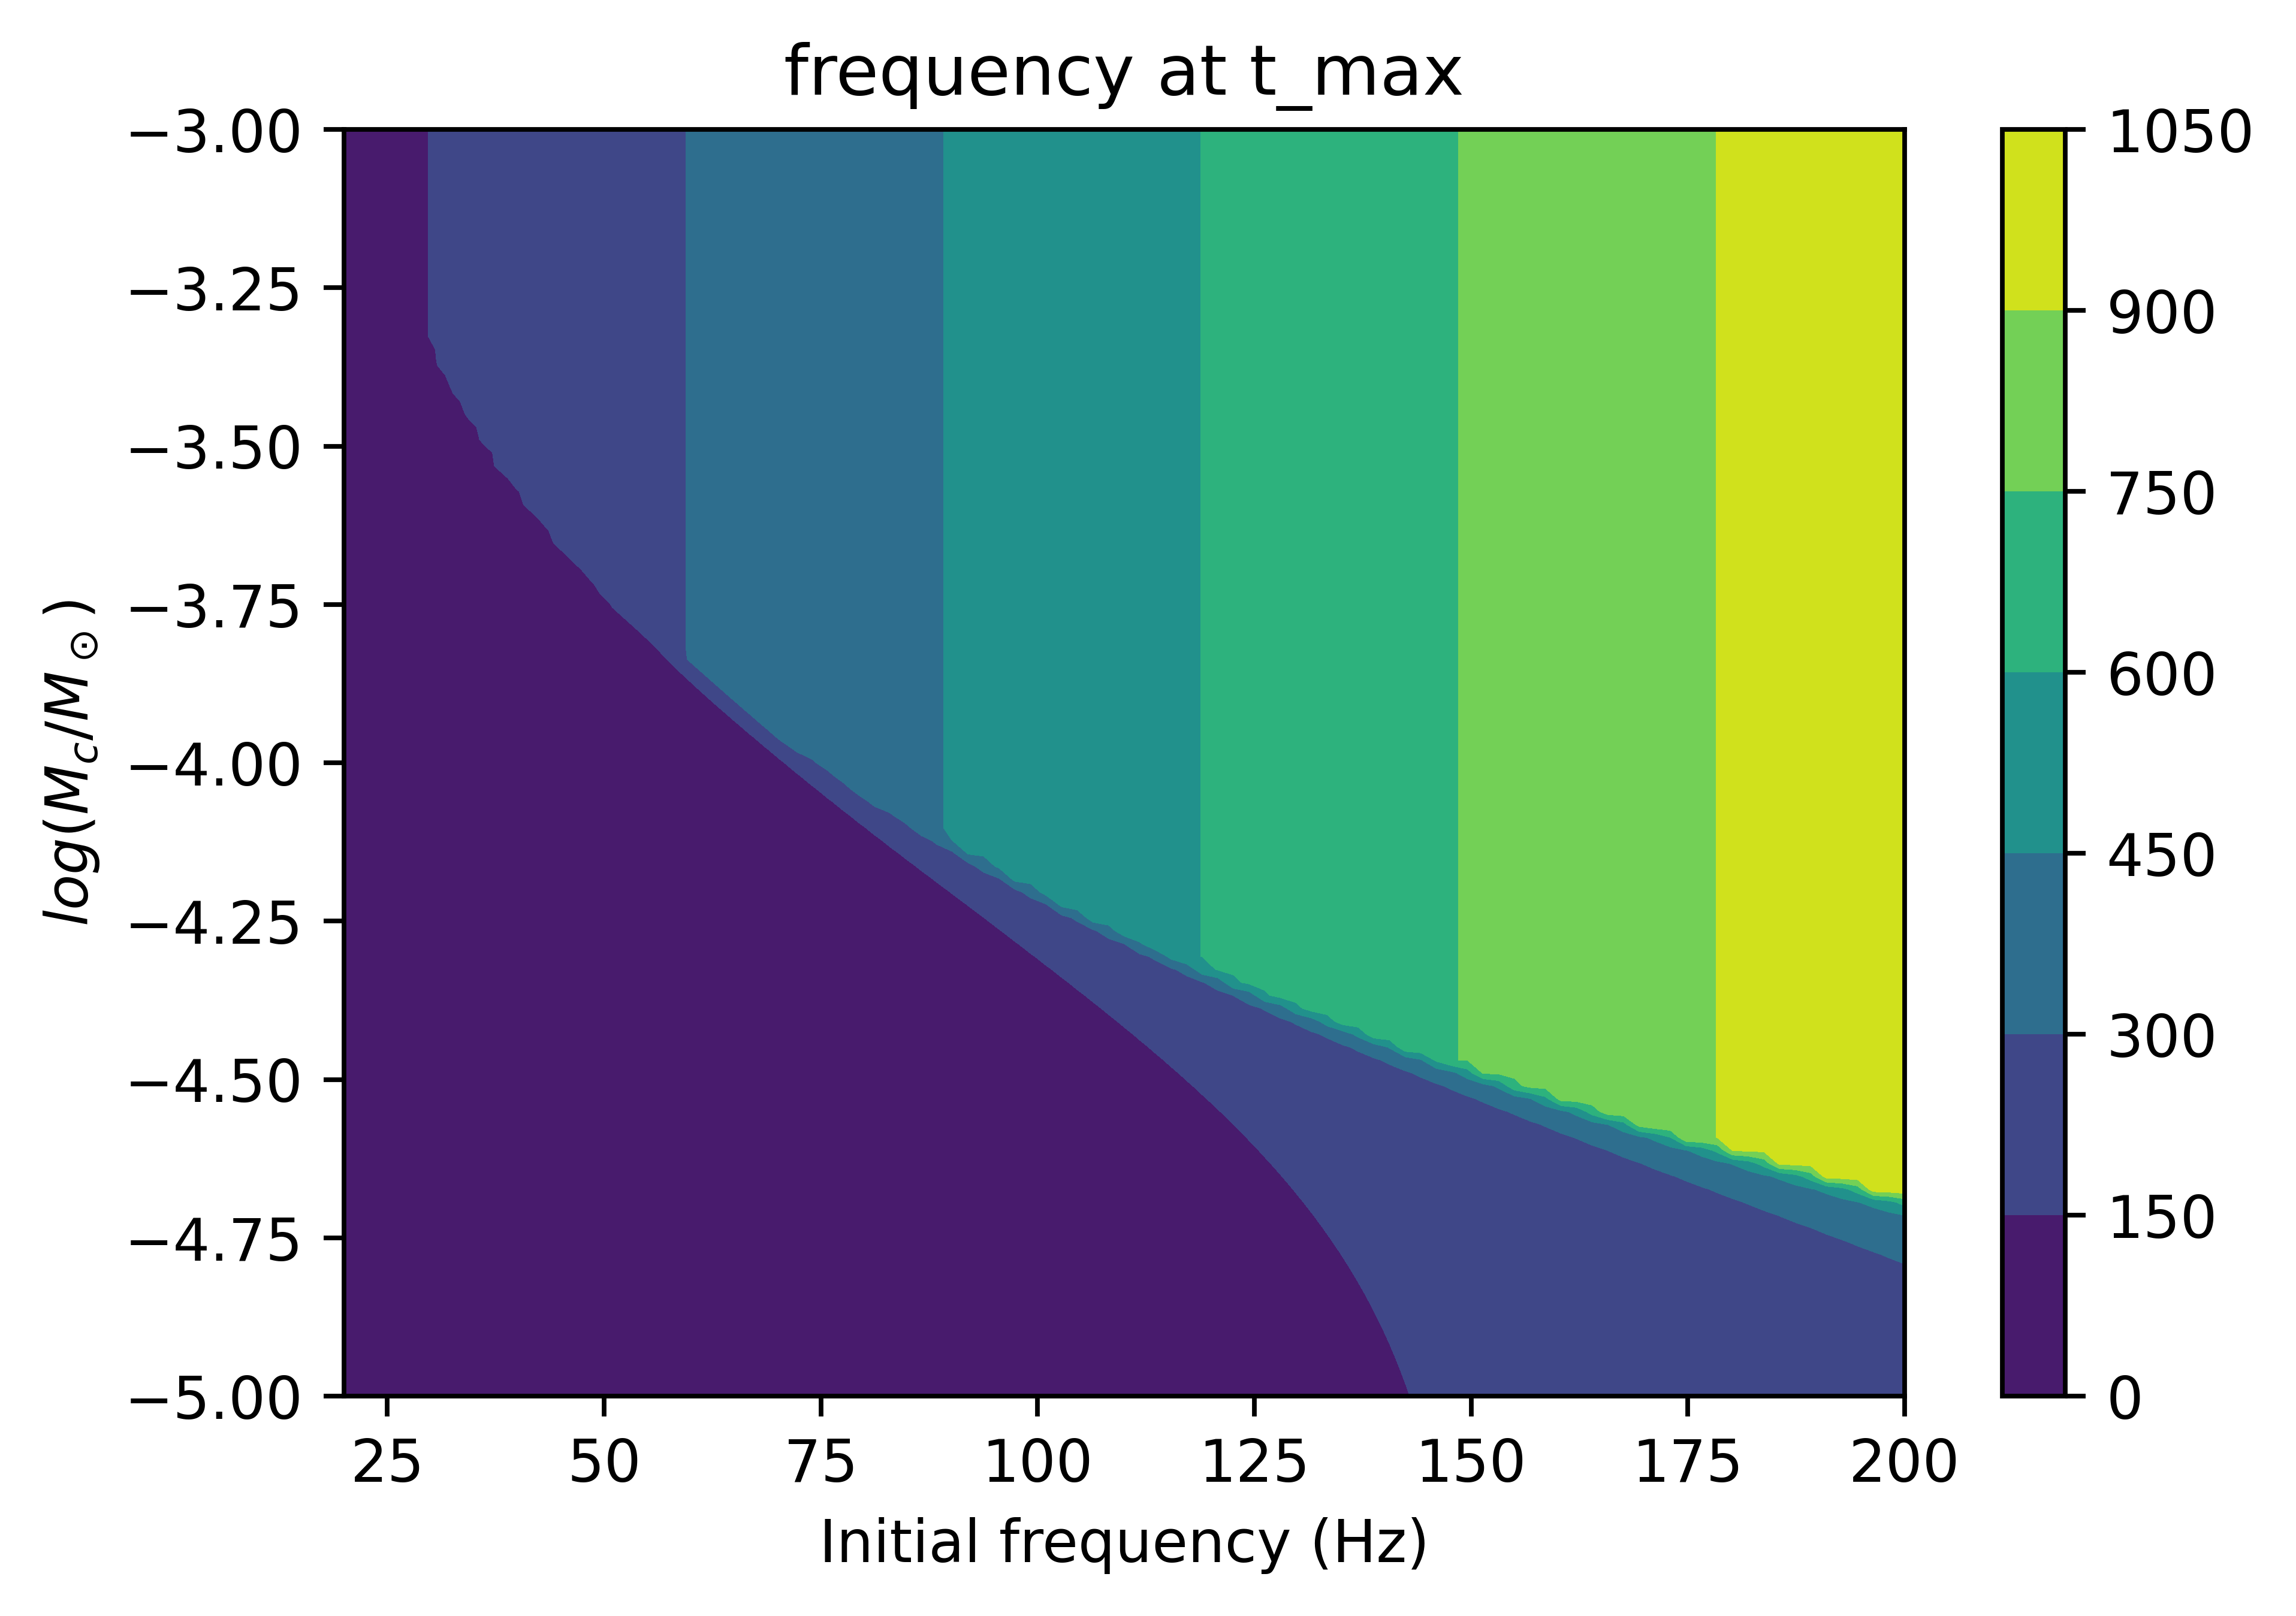

In [8]:
pl.contourf(fspace, np.log10(Mspace), final_f)
pl.colorbar()
pl.title(r'frequency at t_max')
pl.xlabel("Initial frequency (Hz)")
pl.ylabel(r'$log(M_c/M_\odot$)')

Text(0, 0.5, '$log(M_c/M_\\odot$)')

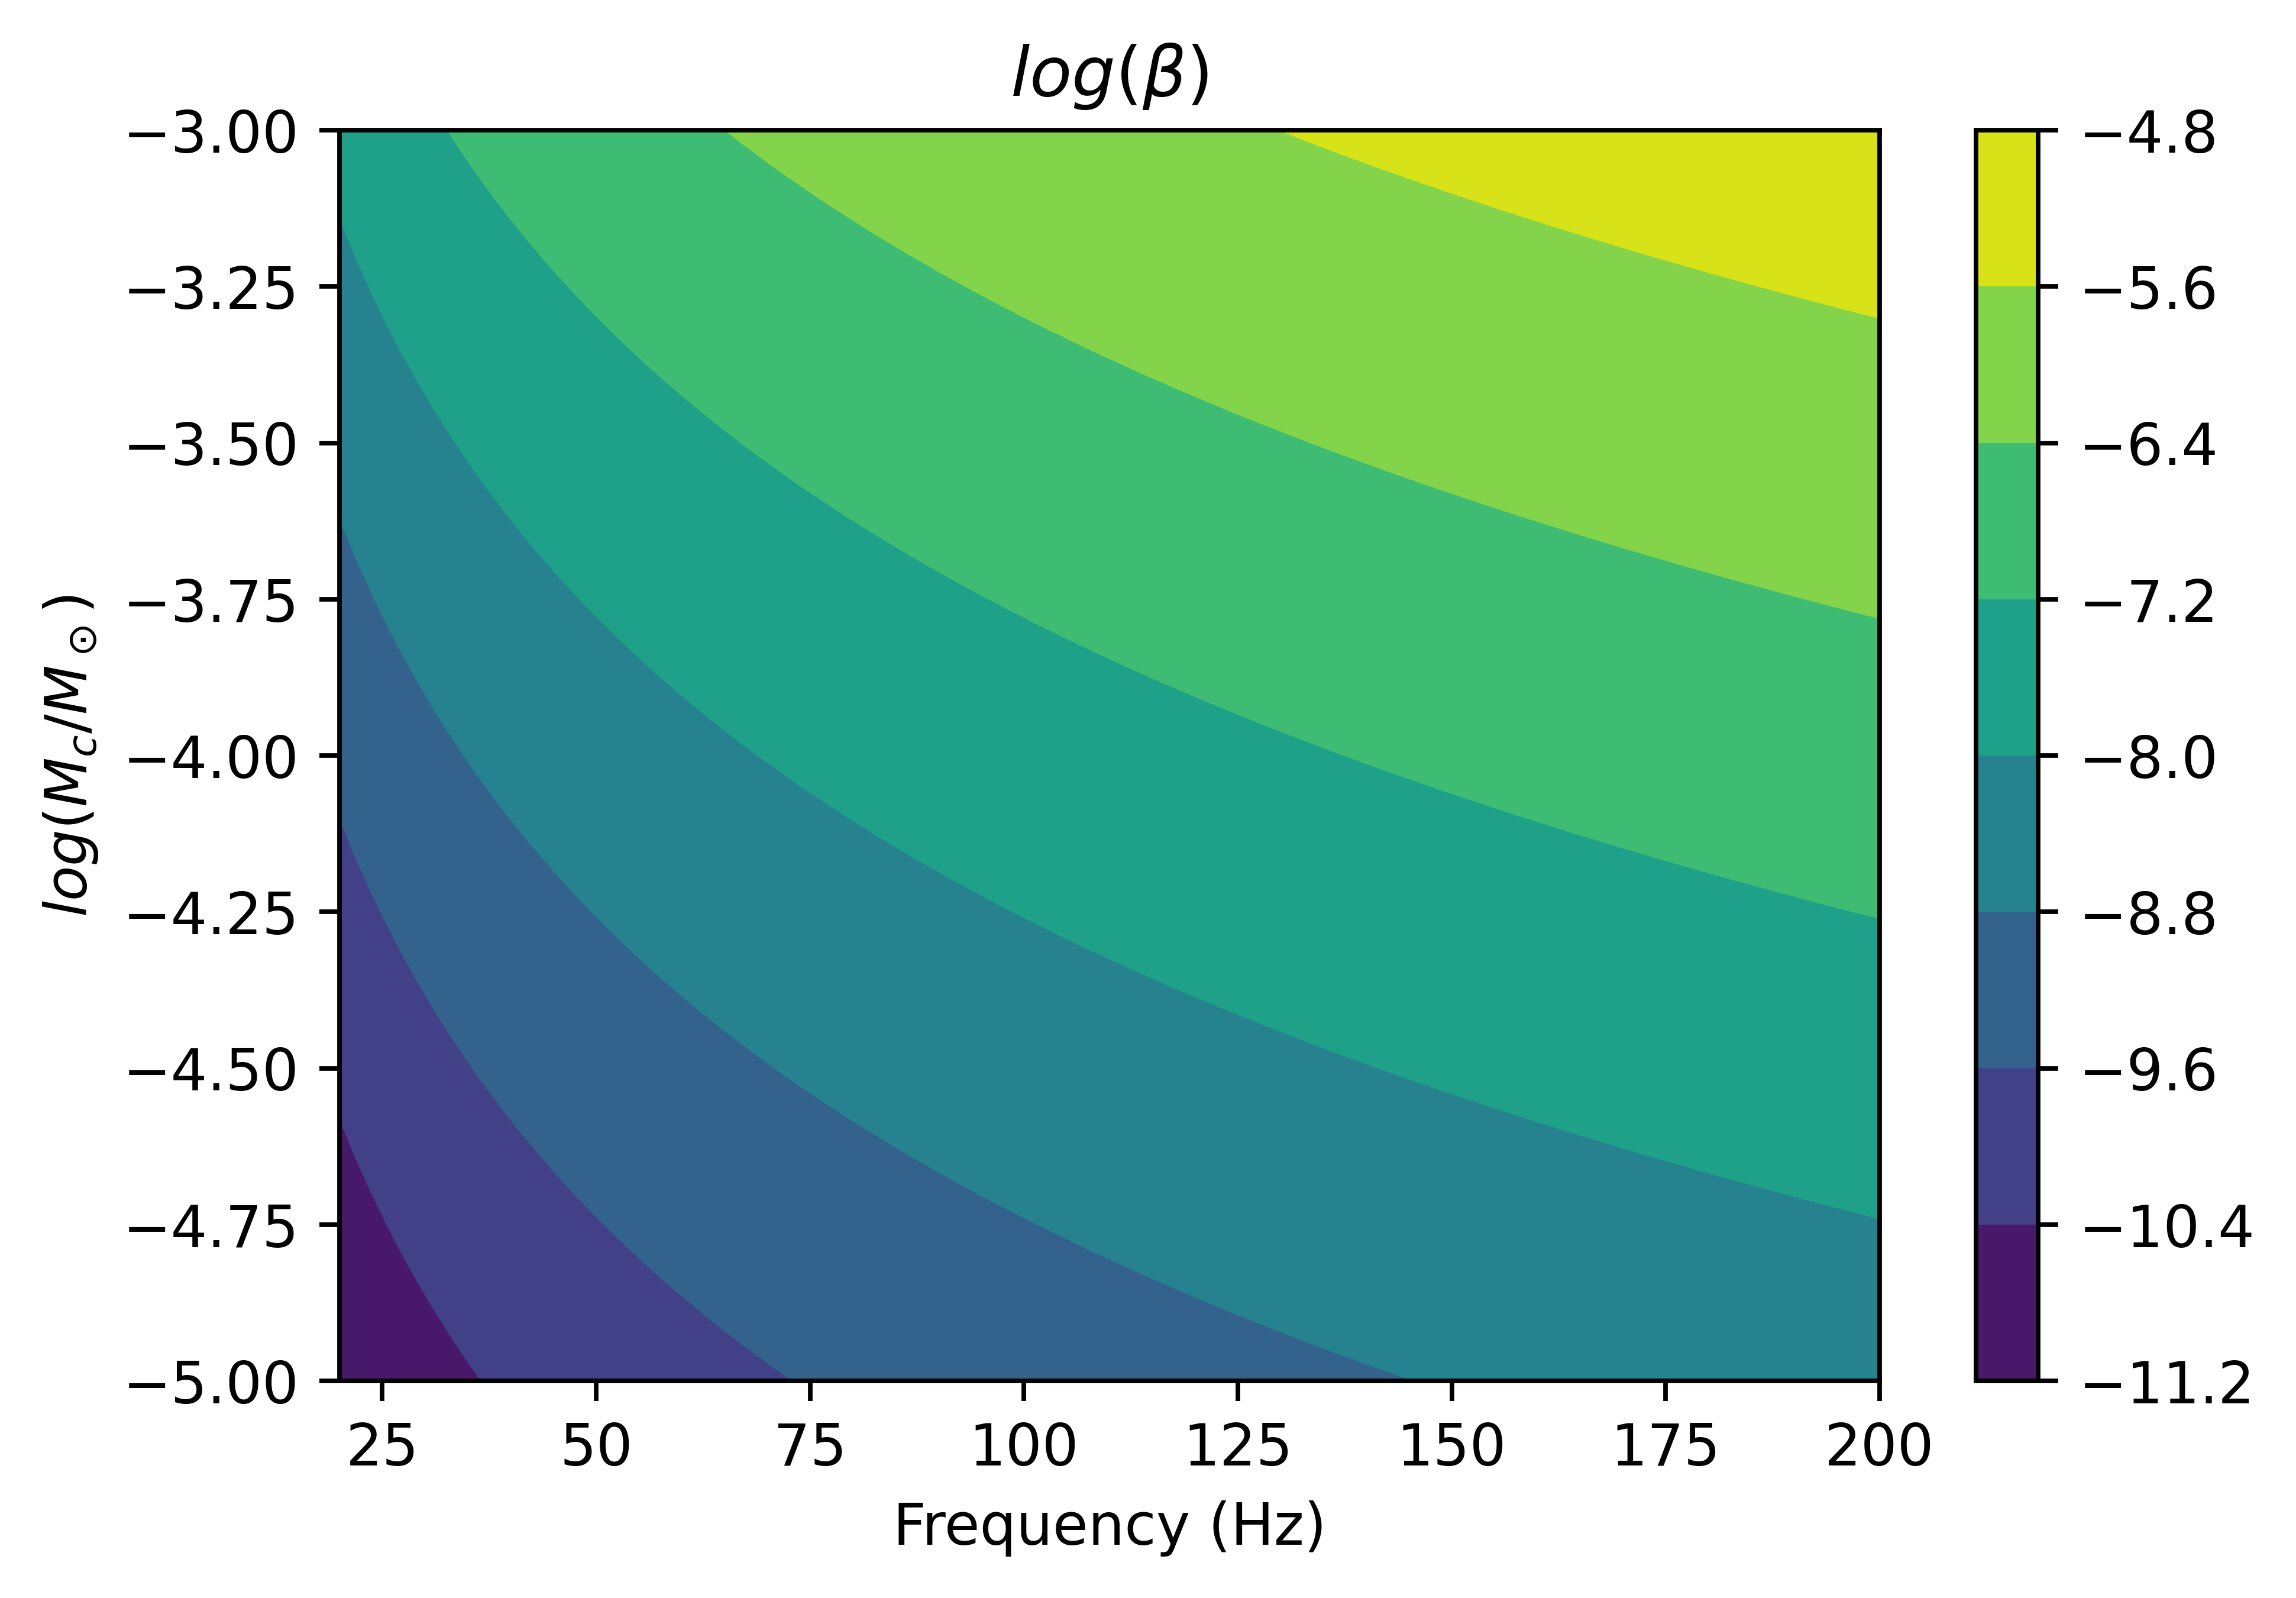

In [9]:
pl.contourf(fspace, np.log10(Mspace), np.log10(betaGrid))
pl.colorbar()
pl.title(r'$log(\beta)$')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$log(M_c/M_\odot$)')

## Sensitivity

In [10]:
def integrated_func(t, f0, Mc):
    temp0 = np.power((1-8/3*beta_calc(f0, Mc)*t),-0.5)
    temp1 = interp_asd(f_calc(t, f0, Mc))**2
    return temp0/temp1

def distance_sensitivity(T, f0, Mc, l = 47):
    integration = integrate.quad(integrated_func, 0, T, args = (f0, Mc))[0]
    temp0 = np.sqrt(0.02115/(l))*(5/96)
    temp1 = 3*1e8*beta_calc(f0,Mc)/f0**2
    return temp0*temp1*np.sqrt(integration)

In [11]:
sens_grid = [[distance_sensitivity(tMax_grid[j,i], fspace[i], Mspace[j], l=34) for i in range(len(fspace))] for j in range(len(Mspace))]
sens_grid = np.divide(sens_grid, 3e16)

/home/neil/anaconda3/envs/PBHs/lib/python3.7/site-packages/ipykernel_launcher.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  import sys
/home/neil/anaconda3/envs/PBHs/lib/python3.7/site-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys


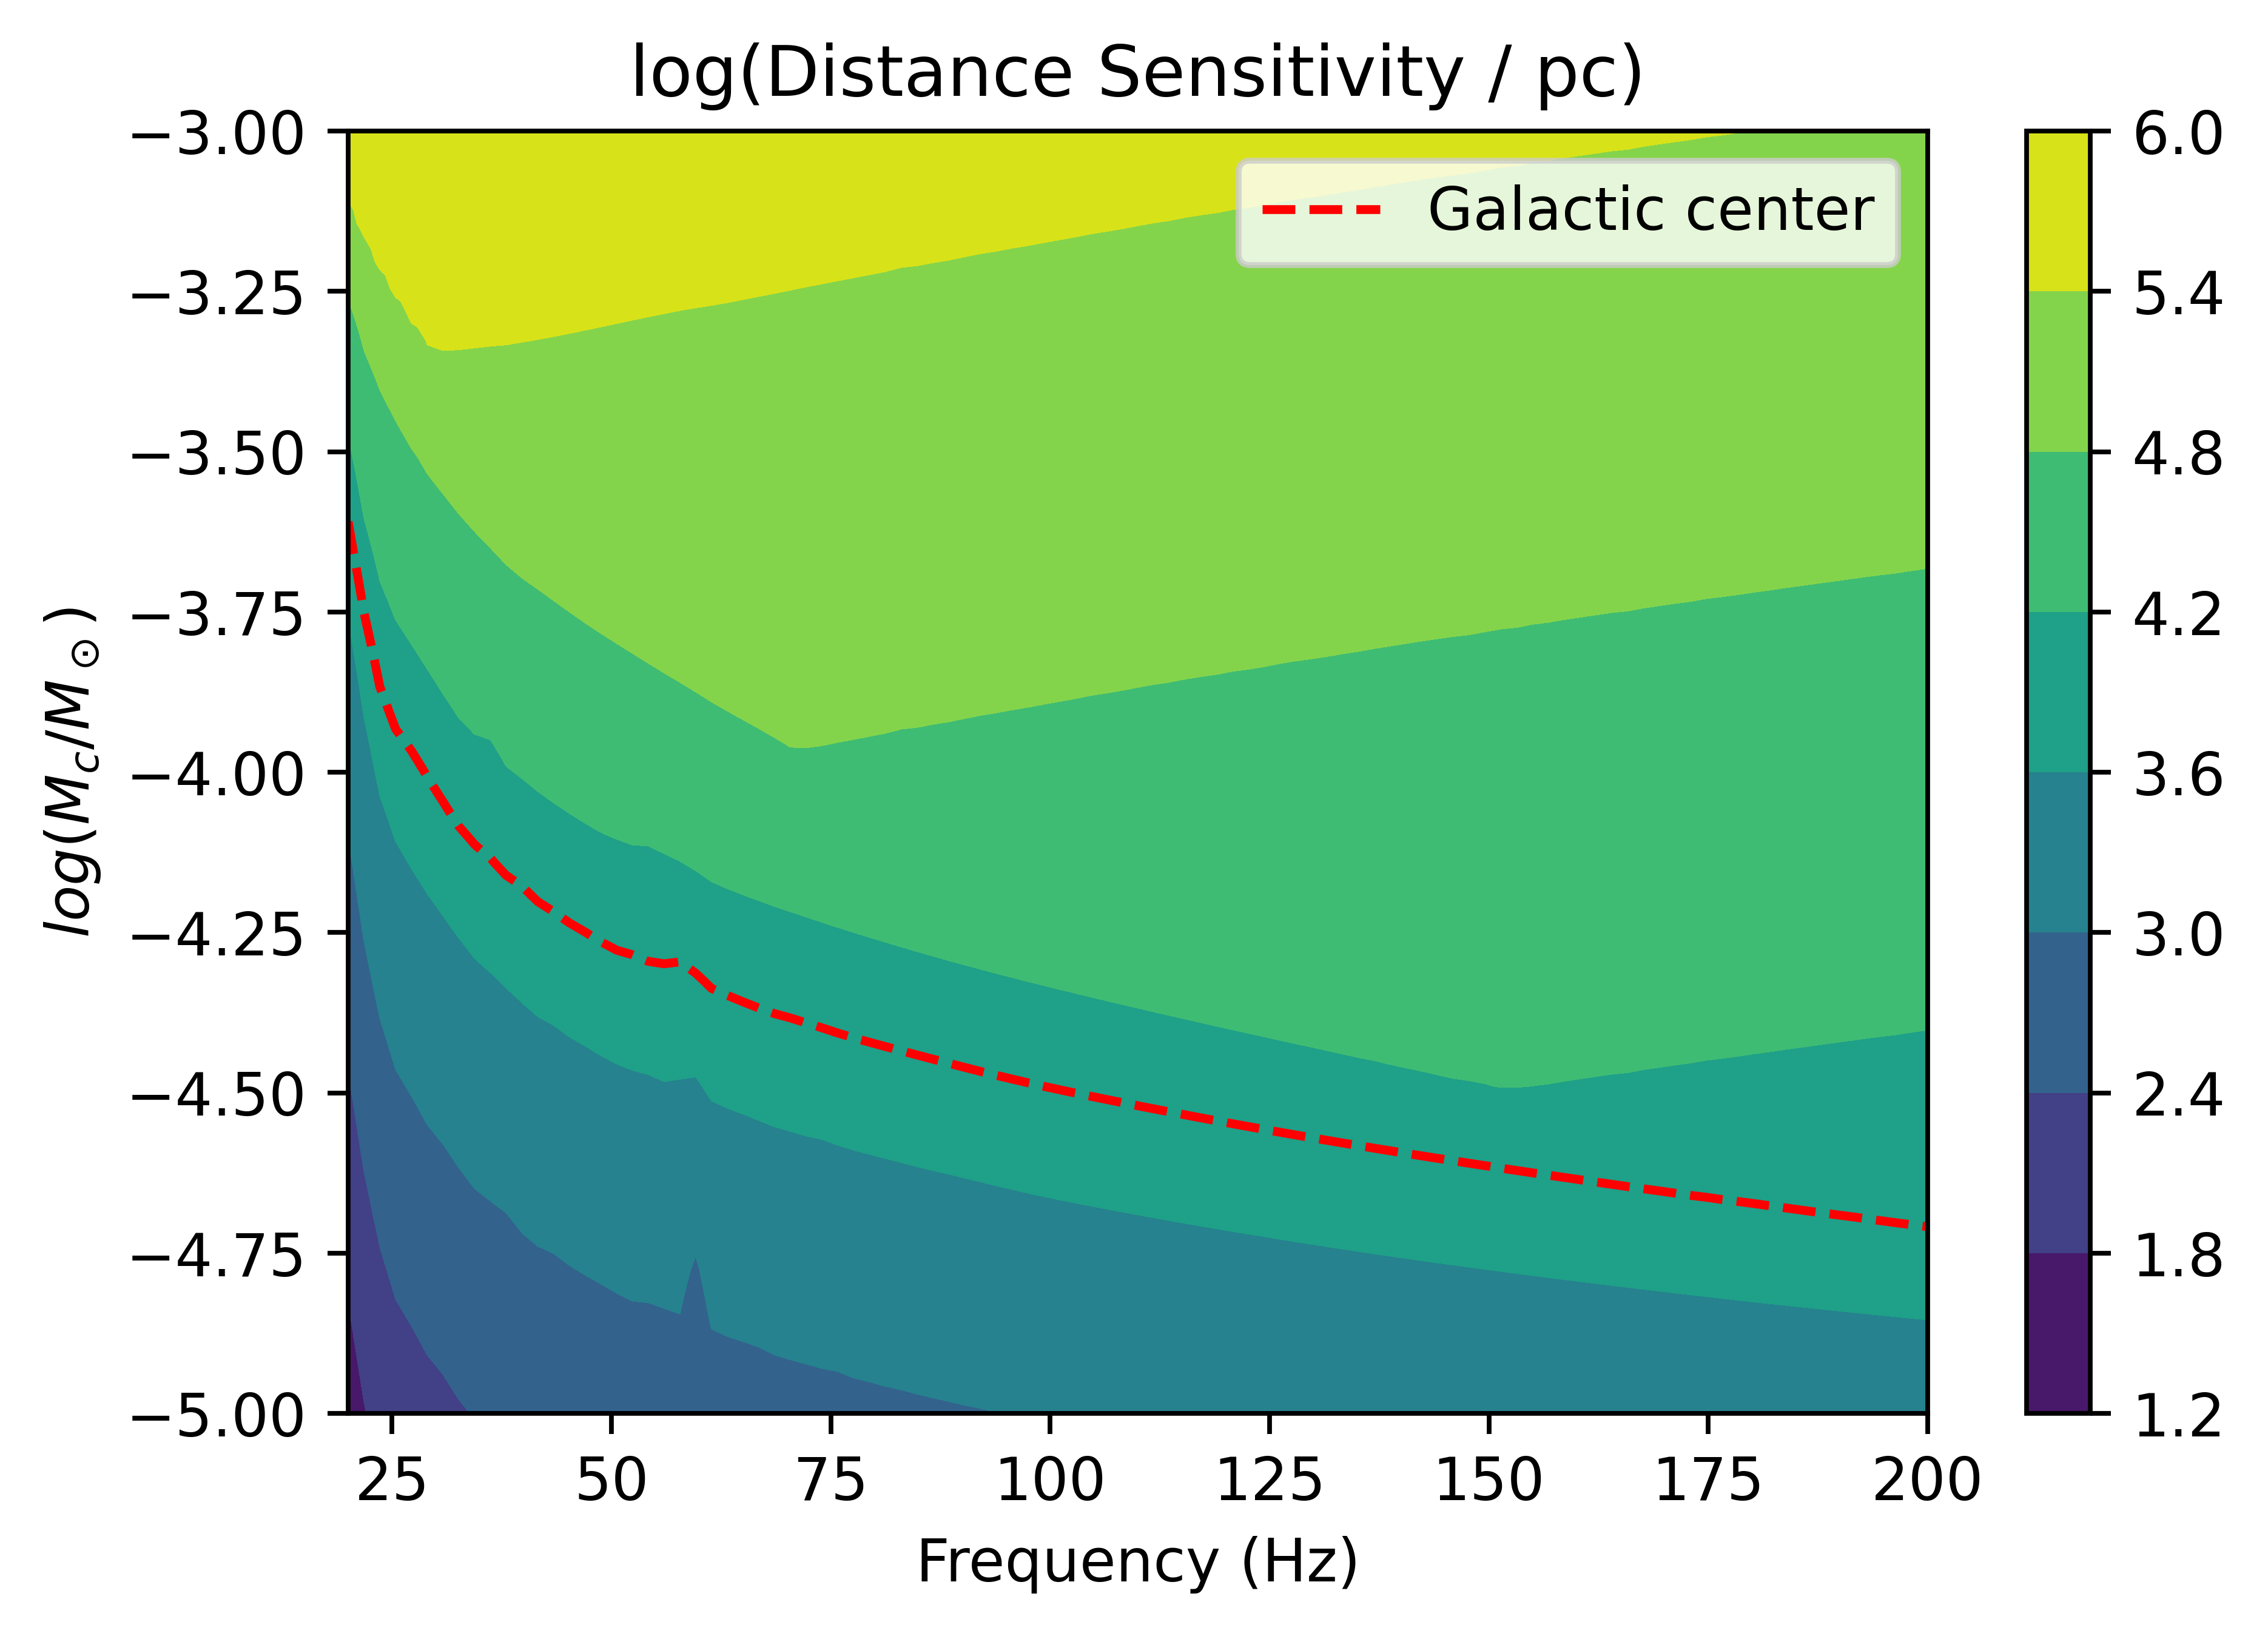

In [15]:
pl.contourf(fspace, np.log10(Mspace), np.log10(sens_grid))
pl.colorbar()
pl.contour(fspace, np.log10(Mspace), np.log10(sens_grid), [np.log10(8000)], colors = 'red', linestyles = '--')
pl.title(r'log(Distance Sensitivity / pc)')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$log(M_c/M_\odot$)')

from matplotlib.lines import Line2D
line = Line2D([0], [0], label='Galactic center', color='r', ls = '--')
pl.legend(handles = [line])
# pl.savefig("Distance_sensitivity.jpg", format = "jpeg")

In [13]:
def h0_calc(d, f, M):
    m_corr = M*2e30
    temp0 = 4/d
    temp1 = (G*m_corr/(c**2))**(5/3)
    temp2 = (pi*f/c)**(2/3)
    return temp0 * temp1 * temp2

In [14]:
def d_calc(h0, f, M):
    m_corr = M*2e30
    temp0 = 4/h0
    temp1 = (G*m_corr/(c**2))**(5/3)
    temp2 = (pi*f/c)**(2/3)
    return temp0 * temp1 * temp2

In [15]:
temp_dist = sens_grid[0,0] * 3e16
h0_calc(temp_dist, fspace[0], Mspace[0])

1.2972209313402761e-25

In [16]:
prev_sens_grid = [[distance_sensitivity(1e4, fspace[i], Mspace[j]) for i in range(len(fspace))] for j in range(len(Mspace))]
prev_sens_grid = np.divide(prev_sens_grid, 3e16)

/home/neil/anaconda3/envs/PBHs/lib/python3.7/site-packages/ipykernel_launcher.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  import sys
/home/neil/anaconda3/envs/PBHs/lib/python3.7/site-packages/ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys


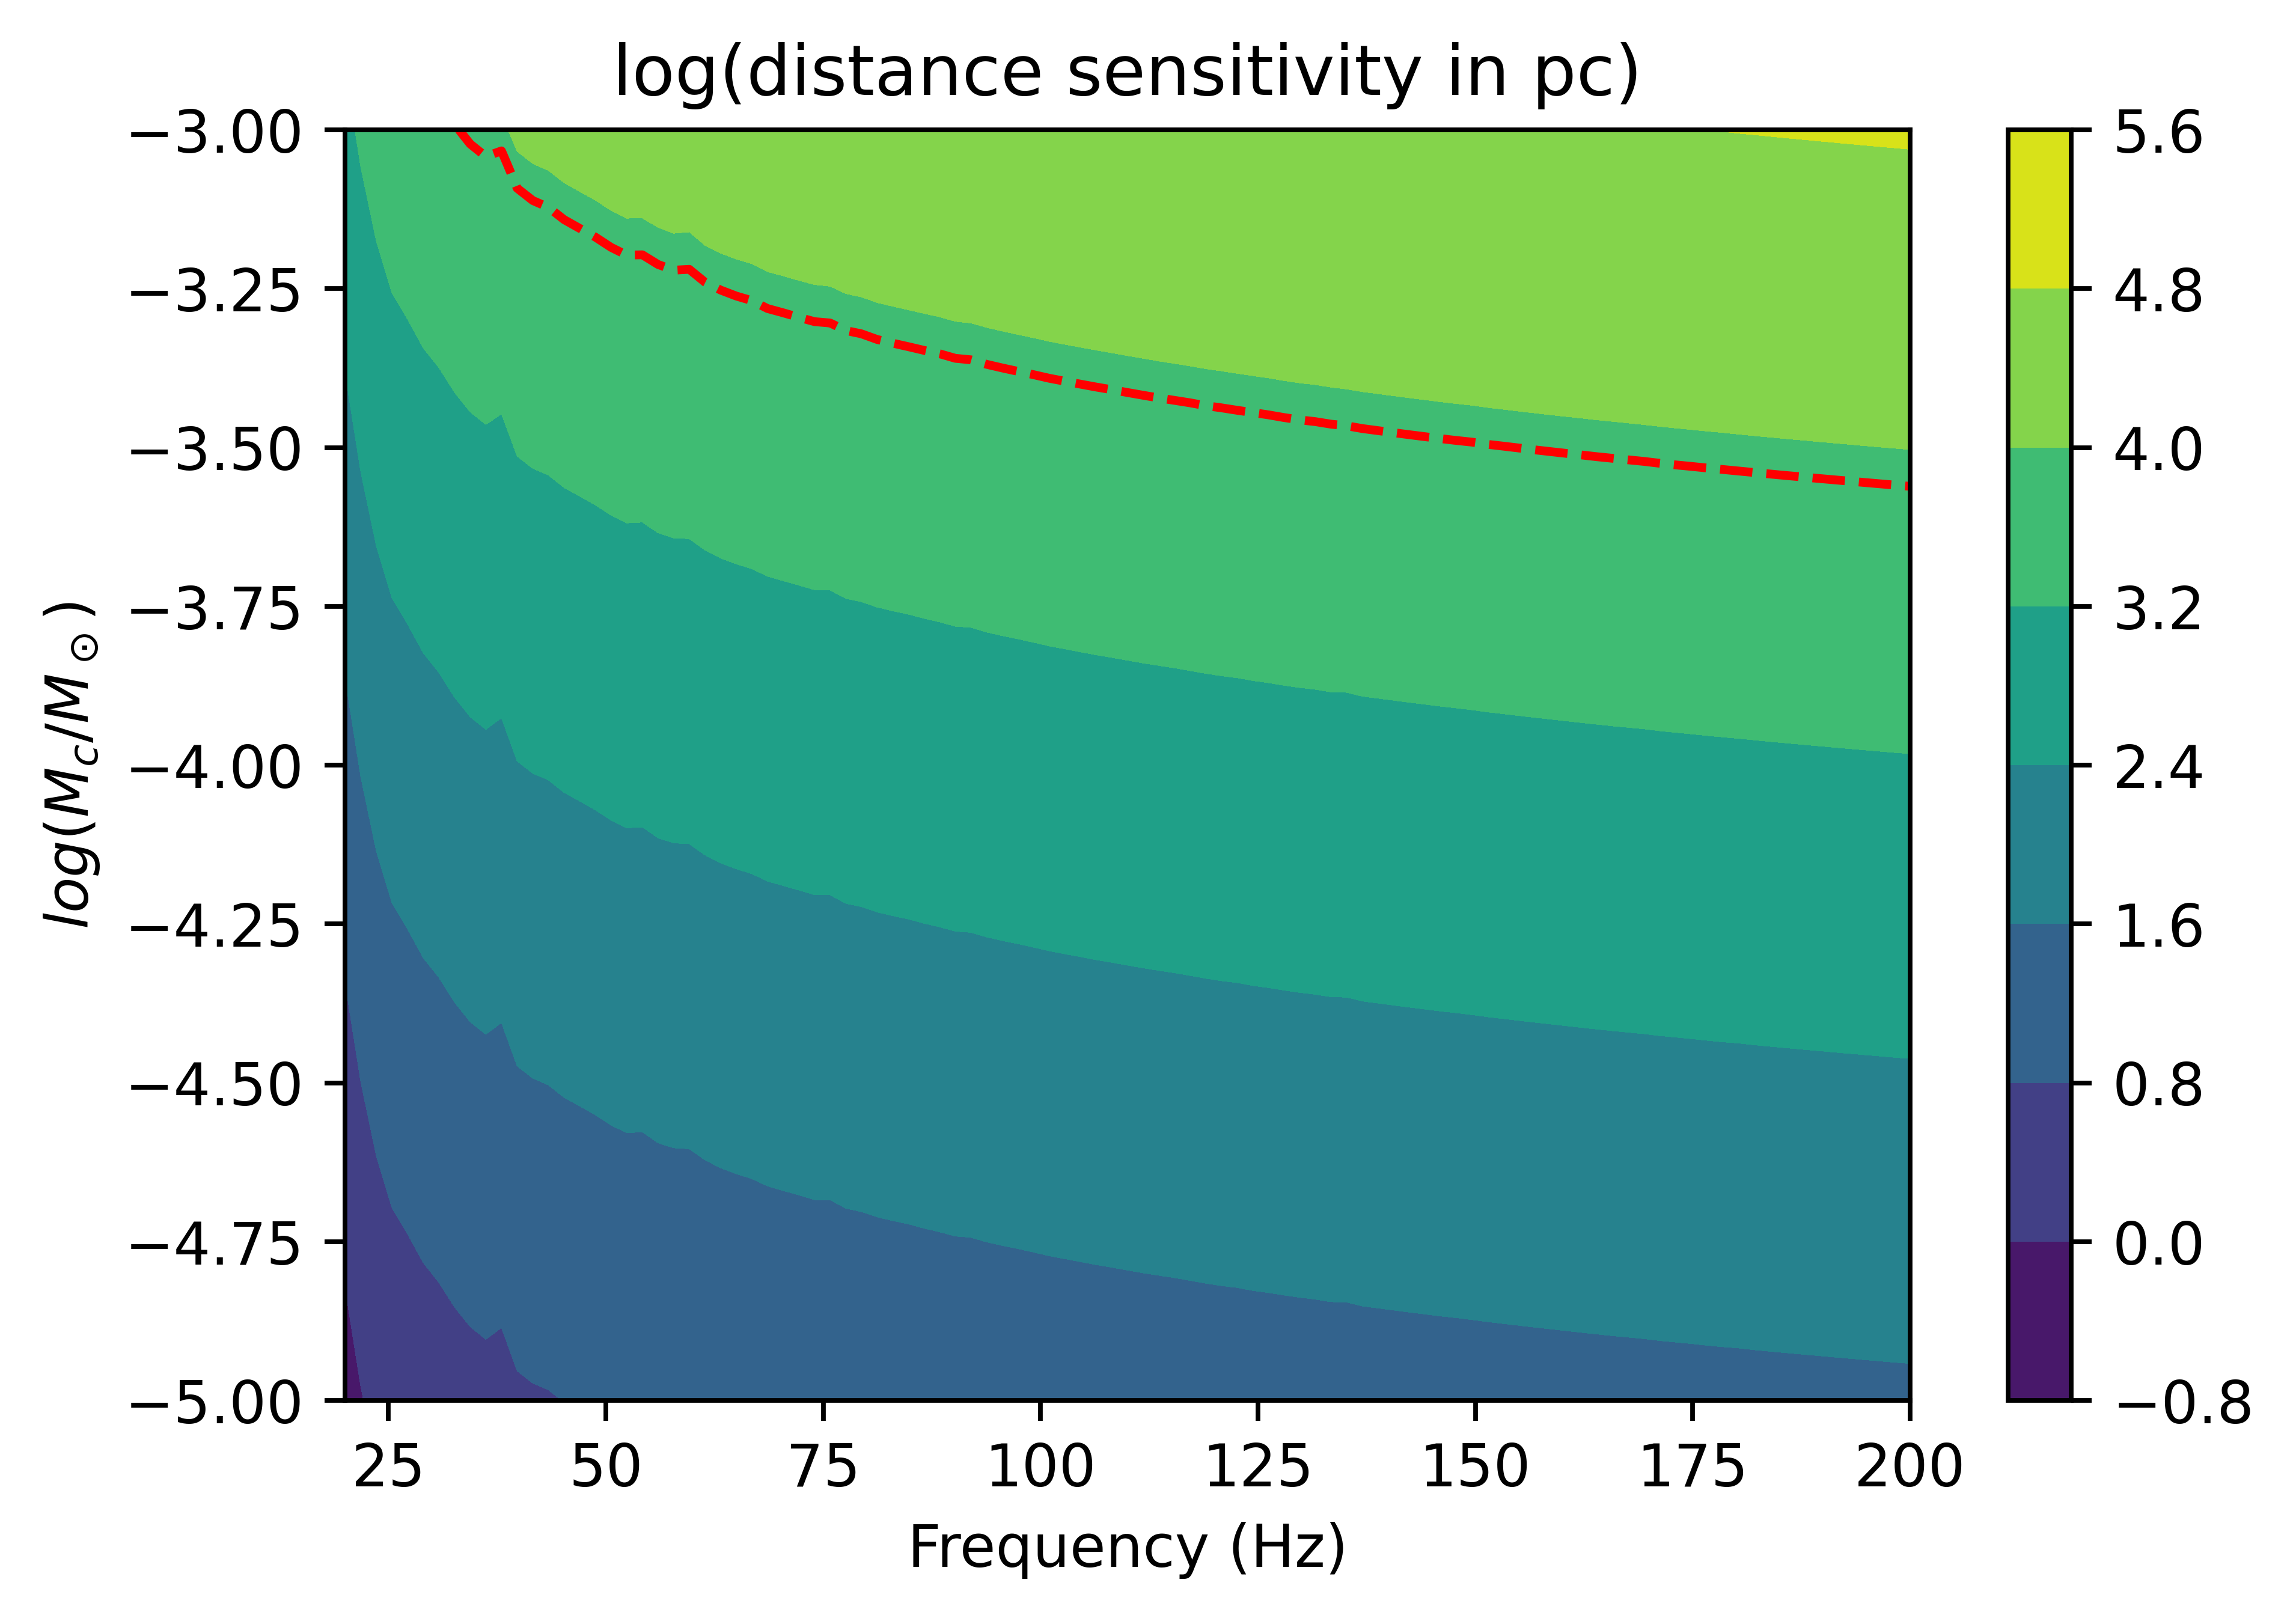

In [17]:
pl.contourf(fspace, np.log10(Mspace), np.log10(prev_sens_grid))
pl.colorbar()
pl.title(r'log(distance sensitivity in pc)')
pl.xlabel("Frequency (Hz)")
pl.ylabel(r'$log(M_c/M_\odot$)')
pl.contour(fspace, np.log10(Mspace), np.log10(prev_sens_grid), [np.log10(8000)], colors = 'red', linestyles = '--')